In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
from mingpt.utils import set_seed
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt
set_seed(3407)

In [2]:
buffer_states = np.load("Buffer.npz")["states"]
traj_lengths = np.array([np.argmax([(np.zeros(9) == buffer_states[i,j]).all() for j in range(buffer_states.shape[1])] + [True]) for i in range(buffer_states.shape[0])])
length_between_samples = 50

In [3]:
buffer_states.shape

(6981, 45, 9)

In [4]:
buffer_states_new = []

def encode(s):
    num_buckets = 20
    ac_low = np.array([-3, -2, -1])
    ac_high = np.array([3, 2, 1])
    bucket_size = (ac_high - ac_low)/num_buckets
    bucket_idx = (s[:3] - ac_low) // (bucket_size + 1e-9)
    bucket_idx = np.clip(bucket_idx, 0, num_buckets - 1)
    return "$".join([str(int(x)) for x in bucket_idx])

for j, traj in enumerate(buffer_states):
    print(j, "of", len(buffer_states))
    skip = True
    for s in traj:
        if encode(s[:3]) == encode(np.array([2, -1, 0])) or encode(s[:3]) == encode(np.array([2, 1, 0])):
            print("In here")
            skip = False
            break
    if not skip:
        buffer_states_new.append(traj)

buffer_states = buffer_states[0:100]
buffer_states = list(buffer_states) + buffer_states_new
buffer_states = np.asarray(buffer_states)

0 of 6981
1 of 6981
2 of 6981
In here
3 of 6981
4 of 6981
5 of 6981
6 of 6981
7 of 6981
8 of 6981
9 of 6981
10 of 6981
11 of 6981
12 of 6981
13 of 6981
14 of 6981
15 of 6981
16 of 6981
17 of 6981
18 of 6981
19 of 6981
20 of 6981
21 of 6981
22 of 6981
23 of 6981
24 of 6981
25 of 6981
26 of 6981
27 of 6981
28 of 6981
29 of 6981
30 of 6981
31 of 6981
32 of 6981
33 of 6981
34 of 6981
35 of 6981
36 of 6981
37 of 6981
38 of 6981
39 of 6981
40 of 6981
41 of 6981
42 of 6981
43 of 6981
44 of 6981
45 of 6981
46 of 6981
47 of 6981
48 of 6981
49 of 6981
50 of 6981
51 of 6981
52 of 6981
53 of 6981
54 of 6981
55 of 6981
56 of 6981
57 of 6981
58 of 6981
59 of 6981
60 of 6981
61 of 6981
62 of 6981
63 of 6981
64 of 6981
65 of 6981
66 of 6981
67 of 6981
68 of 6981
69 of 6981
70 of 6981
71 of 6981
72 of 6981
73 of 6981
74 of 6981
75 of 6981
76 of 6981
77 of 6981
78 of 6981
79 of 6981
80 of 6981
81 of 6981
82 of 6981
83 of 6981
84 of 6981
85 of 6981
86 of 6981
87 of 6981
88 of 6981
89 of 6981
90 of 6981
9

783 of 6981
784 of 6981
785 of 6981
786 of 6981
787 of 6981
788 of 6981
789 of 6981
790 of 6981
791 of 6981
792 of 6981
793 of 6981
794 of 6981
795 of 6981
796 of 6981
797 of 6981
798 of 6981
799 of 6981
800 of 6981
801 of 6981
802 of 6981
803 of 6981
804 of 6981
805 of 6981
806 of 6981
807 of 6981
808 of 6981
809 of 6981
810 of 6981
811 of 6981
812 of 6981
813 of 6981
814 of 6981
815 of 6981
816 of 6981
817 of 6981
818 of 6981
819 of 6981
820 of 6981
821 of 6981
822 of 6981
823 of 6981
824 of 6981
825 of 6981
826 of 6981
827 of 6981
828 of 6981
829 of 6981
830 of 6981
831 of 6981
832 of 6981
833 of 6981
834 of 6981
835 of 6981
836 of 6981
837 of 6981
838 of 6981
839 of 6981
840 of 6981
841 of 6981
842 of 6981
843 of 6981
844 of 6981
845 of 6981
846 of 6981
847 of 6981
848 of 6981
849 of 6981
850 of 6981
851 of 6981
852 of 6981
853 of 6981
854 of 6981
855 of 6981
856 of 6981
857 of 6981
858 of 6981
859 of 6981
860 of 6981
861 of 6981
862 of 6981
863 of 6981
864 of 6981
865 of 6981
866 

1438 of 6981
1439 of 6981
1440 of 6981
1441 of 6981
1442 of 6981
1443 of 6981
1444 of 6981
1445 of 6981
1446 of 6981
1447 of 6981
1448 of 6981
1449 of 6981
1450 of 6981
1451 of 6981
1452 of 6981
1453 of 6981
1454 of 6981
1455 of 6981
1456 of 6981
1457 of 6981
1458 of 6981
1459 of 6981
1460 of 6981
1461 of 6981
1462 of 6981
1463 of 6981
1464 of 6981
1465 of 6981
1466 of 6981
1467 of 6981
1468 of 6981
1469 of 6981
1470 of 6981
1471 of 6981
1472 of 6981
1473 of 6981
1474 of 6981
1475 of 6981
1476 of 6981
1477 of 6981
1478 of 6981
1479 of 6981
1480 of 6981
1481 of 6981
1482 of 6981
1483 of 6981
1484 of 6981
1485 of 6981
1486 of 6981
1487 of 6981
1488 of 6981
1489 of 6981
1490 of 6981
1491 of 6981
1492 of 6981
1493 of 6981
1494 of 6981
1495 of 6981
1496 of 6981
1497 of 6981
1498 of 6981
1499 of 6981
1500 of 6981
1501 of 6981
1502 of 6981
1503 of 6981
1504 of 6981
1505 of 6981
1506 of 6981
1507 of 6981
1508 of 6981
1509 of 6981
1510 of 6981
1511 of 6981
1512 of 6981
1513 of 6981
1514 of 6981

2095 of 6981
2096 of 6981
2097 of 6981
2098 of 6981
2099 of 6981
2100 of 6981
2101 of 6981
2102 of 6981
2103 of 6981
2104 of 6981
2105 of 6981
2106 of 6981
2107 of 6981
2108 of 6981
2109 of 6981
2110 of 6981
2111 of 6981
2112 of 6981
2113 of 6981
2114 of 6981
2115 of 6981
2116 of 6981
2117 of 6981
2118 of 6981
2119 of 6981
2120 of 6981
2121 of 6981
2122 of 6981
2123 of 6981
2124 of 6981
2125 of 6981
2126 of 6981
2127 of 6981
2128 of 6981
2129 of 6981
2130 of 6981
2131 of 6981
2132 of 6981
2133 of 6981
2134 of 6981
2135 of 6981
2136 of 6981
2137 of 6981
2138 of 6981
2139 of 6981
2140 of 6981
2141 of 6981
2142 of 6981
2143 of 6981
2144 of 6981
2145 of 6981
2146 of 6981
2147 of 6981
2148 of 6981
2149 of 6981
2150 of 6981
2151 of 6981
2152 of 6981
2153 of 6981
2154 of 6981
2155 of 6981
2156 of 6981
2157 of 6981
2158 of 6981
2159 of 6981
2160 of 6981
2161 of 6981
2162 of 6981
2163 of 6981
2164 of 6981
2165 of 6981
2166 of 6981
2167 of 6981
2168 of 6981
2169 of 6981
2170 of 6981
2171 of 6981

2754 of 6981
2755 of 6981
2756 of 6981
2757 of 6981
2758 of 6981
2759 of 6981
2760 of 6981
2761 of 6981
2762 of 6981
2763 of 6981
2764 of 6981
2765 of 6981
2766 of 6981
2767 of 6981
2768 of 6981
2769 of 6981
2770 of 6981
2771 of 6981
2772 of 6981
2773 of 6981
2774 of 6981
2775 of 6981
2776 of 6981
2777 of 6981
2778 of 6981
2779 of 6981
2780 of 6981
2781 of 6981
2782 of 6981
2783 of 6981
2784 of 6981
2785 of 6981
2786 of 6981
2787 of 6981
2788 of 6981
2789 of 6981
2790 of 6981
2791 of 6981
2792 of 6981
2793 of 6981
2794 of 6981
2795 of 6981
2796 of 6981
2797 of 6981
2798 of 6981
2799 of 6981
2800 of 6981
2801 of 6981
2802 of 6981
2803 of 6981
2804 of 6981
2805 of 6981
2806 of 6981
2807 of 6981
2808 of 6981
2809 of 6981
2810 of 6981
2811 of 6981
2812 of 6981
2813 of 6981
2814 of 6981
2815 of 6981
2816 of 6981
2817 of 6981
2818 of 6981
2819 of 6981
2820 of 6981
2821 of 6981
2822 of 6981
2823 of 6981
2824 of 6981
2825 of 6981
2826 of 6981
2827 of 6981
2828 of 6981
2829 of 6981
2830 of 6981

3408 of 6981
3409 of 6981
3410 of 6981
3411 of 6981
3412 of 6981
3413 of 6981
3414 of 6981
3415 of 6981
3416 of 6981
3417 of 6981
3418 of 6981
3419 of 6981
3420 of 6981
3421 of 6981
3422 of 6981
3423 of 6981
3424 of 6981
3425 of 6981
3426 of 6981
3427 of 6981
3428 of 6981
3429 of 6981
3430 of 6981
3431 of 6981
3432 of 6981
3433 of 6981
3434 of 6981
3435 of 6981
3436 of 6981
3437 of 6981
3438 of 6981
3439 of 6981
3440 of 6981
3441 of 6981
3442 of 6981
3443 of 6981
3444 of 6981
3445 of 6981
3446 of 6981
3447 of 6981
3448 of 6981
3449 of 6981
3450 of 6981
3451 of 6981
3452 of 6981
3453 of 6981
3454 of 6981
3455 of 6981
3456 of 6981
3457 of 6981
3458 of 6981
3459 of 6981
3460 of 6981
3461 of 6981
3462 of 6981
3463 of 6981
3464 of 6981
3465 of 6981
3466 of 6981
3467 of 6981
3468 of 6981
3469 of 6981
3470 of 6981
3471 of 6981
3472 of 6981
3473 of 6981
3474 of 6981
3475 of 6981
3476 of 6981
3477 of 6981
3478 of 6981
3479 of 6981
3480 of 6981
3481 of 6981
3482 of 6981
3483 of 6981
3484 of 6981

4063 of 6981
4064 of 6981
4065 of 6981
4066 of 6981
4067 of 6981
4068 of 6981
4069 of 6981
4070 of 6981
4071 of 6981
4072 of 6981
4073 of 6981
4074 of 6981
4075 of 6981
4076 of 6981
4077 of 6981
4078 of 6981
4079 of 6981
4080 of 6981
4081 of 6981
4082 of 6981
4083 of 6981
4084 of 6981
4085 of 6981
4086 of 6981
4087 of 6981
4088 of 6981
4089 of 6981
4090 of 6981
4091 of 6981
4092 of 6981
4093 of 6981
4094 of 6981
4095 of 6981
4096 of 6981
4097 of 6981
4098 of 6981
4099 of 6981
4100 of 6981
4101 of 6981
4102 of 6981
4103 of 6981
4104 of 6981
4105 of 6981
4106 of 6981
4107 of 6981
4108 of 6981
4109 of 6981
4110 of 6981
4111 of 6981
4112 of 6981
4113 of 6981
4114 of 6981
4115 of 6981
4116 of 6981
4117 of 6981
4118 of 6981
4119 of 6981
4120 of 6981
4121 of 6981
4122 of 6981
4123 of 6981
4124 of 6981
4125 of 6981
4126 of 6981
4127 of 6981
4128 of 6981
4129 of 6981
4130 of 6981
4131 of 6981
4132 of 6981
4133 of 6981
4134 of 6981
4135 of 6981
4136 of 6981
4137 of 6981
4138 of 6981
4139 of 6981

4718 of 6981
4719 of 6981
4720 of 6981
4721 of 6981
4722 of 6981
4723 of 6981
4724 of 6981
4725 of 6981
4726 of 6981
4727 of 6981
4728 of 6981
4729 of 6981
4730 of 6981
4731 of 6981
4732 of 6981
4733 of 6981
4734 of 6981
4735 of 6981
4736 of 6981
4737 of 6981
4738 of 6981
4739 of 6981
4740 of 6981
4741 of 6981
4742 of 6981
4743 of 6981
4744 of 6981
4745 of 6981
4746 of 6981
4747 of 6981
4748 of 6981
4749 of 6981
4750 of 6981
4751 of 6981
4752 of 6981
4753 of 6981
4754 of 6981
4755 of 6981
4756 of 6981
4757 of 6981
4758 of 6981
4759 of 6981
4760 of 6981
4761 of 6981
4762 of 6981
4763 of 6981
4764 of 6981
4765 of 6981
4766 of 6981
4767 of 6981
4768 of 6981
4769 of 6981
4770 of 6981
4771 of 6981
4772 of 6981
4773 of 6981
4774 of 6981
4775 of 6981
4776 of 6981
4777 of 6981
4778 of 6981
4779 of 6981
4780 of 6981
4781 of 6981
4782 of 6981
4783 of 6981
4784 of 6981
4785 of 6981
4786 of 6981
4787 of 6981
4788 of 6981
4789 of 6981
4790 of 6981
4791 of 6981
4792 of 6981
4793 of 6981
4794 of 6981

5367 of 6981
5368 of 6981
5369 of 6981
5370 of 6981
5371 of 6981
5372 of 6981
5373 of 6981
5374 of 6981
5375 of 6981
5376 of 6981
5377 of 6981
5378 of 6981
5379 of 6981
5380 of 6981
5381 of 6981
5382 of 6981
5383 of 6981
5384 of 6981
5385 of 6981
5386 of 6981
5387 of 6981
5388 of 6981
5389 of 6981
5390 of 6981
5391 of 6981
5392 of 6981
5393 of 6981
5394 of 6981
5395 of 6981
5396 of 6981
5397 of 6981
5398 of 6981
5399 of 6981
5400 of 6981
5401 of 6981
5402 of 6981
5403 of 6981
5404 of 6981
5405 of 6981
5406 of 6981
5407 of 6981
5408 of 6981
5409 of 6981
5410 of 6981
5411 of 6981
5412 of 6981
5413 of 6981
5414 of 6981
5415 of 6981
5416 of 6981
5417 of 6981
5418 of 6981
5419 of 6981
5420 of 6981
5421 of 6981
5422 of 6981
5423 of 6981
5424 of 6981
5425 of 6981
5426 of 6981
5427 of 6981
5428 of 6981
5429 of 6981
5430 of 6981
5431 of 6981
5432 of 6981
5433 of 6981
5434 of 6981
5435 of 6981
5436 of 6981
5437 of 6981
5438 of 6981
5439 of 6981
5440 of 6981
5441 of 6981
5442 of 6981
5443 of 6981

6021 of 6981
6022 of 6981
6023 of 6981
6024 of 6981
6025 of 6981
6026 of 6981
6027 of 6981
6028 of 6981
6029 of 6981
6030 of 6981
6031 of 6981
6032 of 6981
6033 of 6981
6034 of 6981
6035 of 6981
6036 of 6981
6037 of 6981
6038 of 6981
6039 of 6981
6040 of 6981
6041 of 6981
6042 of 6981
6043 of 6981
6044 of 6981
6045 of 6981
6046 of 6981
6047 of 6981
6048 of 6981
6049 of 6981
6050 of 6981
6051 of 6981
6052 of 6981
6053 of 6981
6054 of 6981
6055 of 6981
6056 of 6981
6057 of 6981
6058 of 6981
6059 of 6981
6060 of 6981
6061 of 6981
6062 of 6981
6063 of 6981
6064 of 6981
6065 of 6981
6066 of 6981
6067 of 6981
6068 of 6981
6069 of 6981
6070 of 6981
6071 of 6981
6072 of 6981
6073 of 6981
6074 of 6981
6075 of 6981
6076 of 6981
6077 of 6981
6078 of 6981
6079 of 6981
6080 of 6981
6081 of 6981
6082 of 6981
6083 of 6981
6084 of 6981
6085 of 6981
6086 of 6981
6087 of 6981
6088 of 6981
6089 of 6981
6090 of 6981
6091 of 6981
6092 of 6981
6093 of 6981
6094 of 6981
6095 of 6981
6096 of 6981
6097 of 6981

6677 of 6981
6678 of 6981
6679 of 6981
6680 of 6981
6681 of 6981
6682 of 6981
6683 of 6981
6684 of 6981
6685 of 6981
6686 of 6981
6687 of 6981
6688 of 6981
6689 of 6981
6690 of 6981
6691 of 6981
6692 of 6981
6693 of 6981
6694 of 6981
6695 of 6981
6696 of 6981
6697 of 6981
6698 of 6981
6699 of 6981
6700 of 6981
6701 of 6981
6702 of 6981
6703 of 6981
6704 of 6981
6705 of 6981
6706 of 6981
6707 of 6981
6708 of 6981
6709 of 6981
6710 of 6981
6711 of 6981
6712 of 6981
6713 of 6981
6714 of 6981
6715 of 6981
6716 of 6981
6717 of 6981
6718 of 6981
6719 of 6981
6720 of 6981
6721 of 6981
6722 of 6981
6723 of 6981
6724 of 6981
6725 of 6981
6726 of 6981
6727 of 6981
6728 of 6981
6729 of 6981
6730 of 6981
6731 of 6981
6732 of 6981
6733 of 6981
6734 of 6981
6735 of 6981
6736 of 6981
6737 of 6981
6738 of 6981
6739 of 6981
6740 of 6981
6741 of 6981
6742 of 6981
6743 of 6981
6744 of 6981
6745 of 6981
6746 of 6981
6747 of 6981
6748 of 6981
6749 of 6981
6750 of 6981
6751 of 6981
6752 of 6981
6753 of 6981

In [5]:
buffer_states.shape

(113, 45, 9)

In [6]:
def sample_visited_batch(batch_size, max_diff):
    """
    Retruns pairs of observations that are at most max_diff timesteps appart
    """

    traj_idxs = np.random.choice(len(buffer_states), batch_size)

    time_idxs_1 = np.random.randint(0, traj_lengths[traj_idxs] - 1)
    time_idxs_2 = np.random.randint(1 + time_idxs_1, np.minimum(traj_lengths[traj_idxs], time_idxs_1 + max_diff + 1))

    observations1 = buffer_states[traj_idxs, time_idxs_1, :3]

    num_buckets = 20
    ac_low = np.array([-3, -2, -1])
    ac_high = np.array([3, 2, 1])
    bucket_size = (ac_high - ac_low)/num_buckets
    bucket_idx = (observations1 - ac_low) // (bucket_size + 1e-9)
    bucket_idx = np.clip(bucket_idx, 0, num_buckets - 1)
    
    observations1 = bucket_idx
    
    observations2 = buffer_states[traj_idxs, time_idxs_2, :3]

    num_buckets = 20
    ac_low = np.array([-3, -2, -1])
    ac_high = np.array([3, 2, 1])
    bucket_size = (ac_high - ac_low)/num_buckets
    bucket_idx = (observations2 - ac_low) // (bucket_size + 1e-9)
    bucket_idx = np.clip(bucket_idx, 0, num_buckets - 1)
    
    observations2 = bucket_idx
    
    return observations1, observations2

In [7]:
class FakeDatasetLoco(Dataset):
    # Takes data of form (action, reward) where reward in [0,1] and action in [0,1]^d and fits the distribution
    # N = vocab size for representing reward and each dimension
    def __init__(self, split, N=20):
        assert split in {'train', 'test'}
        self.split = split
        self.d = 6
        self.N = N
    
    def __len__(self):
        return 10000000
    
    def get_vocab_size(self):
        return self.N
    
    def get_block_size(self):
        # the transformer starts making predictions at the last input element hence + 1, the other + 1 comes from predicting reward and x
        return 1 + self.d

    def __getitem__(self, idx):
        states_1, states_2 = sample_visited_batch(1, length_between_samples)
        states_1 = torch.Tensor(states_1)
        states_2 = torch.Tensor(states_2)
        states = torch.cat([states_1, states_2], dim=-1)
        sol = states.to(torch.long)[0]
        x = torch.cat((torch.tensor([0]), sol), dim=0)
        y = torch.cat((sol, torch.tensor([-1])), dim=0)

        return x, y


In [8]:
# N is the number of bins per dimension
train_dataset = FakeDatasetLoco('train',N=20)

In [9]:
# create a GPT instance
from mingpt.model import GPT

model_config = GPT.get_default_config()
model_config.model_type = 'gpt-nano'
model_config.vocab_size = train_dataset.get_vocab_size()
model_config.block_size = train_dataset.get_block_size()
model = GPT(model_config)

number of parameters: 0.09M


In [10]:
# create a Trainer object
from mingpt.trainer import Trainer

train_config = Trainer.get_default_config()
# train_config.learning_rate = 5e-5 # the model we're using is so small that we can go a bit faster
train_config.max_iters = 10000
train_config.num_workers = 0
trainer = Trainer(train_config, model, train_dataset)

def batch_end_callback(trainer):
    if trainer.iter_num % 100 == 0:
        print(f"iter_dt {trainer.iter_dt * 1000:.2f}ms; iter {trainer.iter_num}: train loss {trainer.loss.item():.5f}")
trainer.set_callback('on_batch_end', batch_end_callback)

trainer.run()

running on device cuda
iter_dt 0.00ms; iter 0: train loss 3.00371
iter_dt 8.23ms; iter 100: train loss 2.65251
iter_dt 8.20ms; iter 200: train loss 2.45554
iter_dt 8.24ms; iter 300: train loss 2.45398
iter_dt 8.31ms; iter 400: train loss 2.30216
iter_dt 8.32ms; iter 500: train loss 2.31847
iter_dt 8.25ms; iter 600: train loss 2.23591
iter_dt 8.34ms; iter 700: train loss 2.31188
iter_dt 8.26ms; iter 800: train loss 2.29462
iter_dt 8.40ms; iter 900: train loss 2.24467
iter_dt 8.27ms; iter 1000: train loss 2.27762
iter_dt 8.29ms; iter 1100: train loss 2.18942
iter_dt 8.26ms; iter 1200: train loss 2.16997
iter_dt 8.28ms; iter 1300: train loss 2.20135
iter_dt 8.32ms; iter 1400: train loss 2.26854
iter_dt 8.27ms; iter 1500: train loss 2.26320
iter_dt 8.31ms; iter 1600: train loss 2.12462
iter_dt 8.25ms; iter 1700: train loss 2.19764
iter_dt 8.41ms; iter 1800: train loss 2.16726
iter_dt 8.37ms; iter 1900: train loss 2.21227
iter_dt 8.21ms; iter 2000: train loss 2.19400
iter_dt 8.37ms; iter 21

In [11]:
# now let's perform some evaluation
model.eval();

In [12]:
def get_lp(goal):
    obs1 =  np.array([2, -1, 0])
    num_buckets = 20
    ac_low = np.array([-3, -2, -1])
    ac_high = np.array([3, 2, 1])
    bucket_size = (ac_high - ac_low)/num_buckets
    
    bucket_idx = (obs1 - ac_low) // (bucket_size + 1e-9)
    obs1 = np.clip(bucket_idx, 0, num_buckets - 1)
    
    bucket_idx = (goal - ac_low) // (bucket_size + 1e-9)
    goal = np.clip(bucket_idx, 0, num_buckets - 1)
    obsgoal = np.concatenate([np.array([0]), obs1, goal])
    idx0 = torch.from_numpy(obsgoal).to(trainer.device).long()[None]
    logits0 = model.forward(idx0)[0]
    full_prob = 1
    for j in range(3, 6):
        full_prob *= F.softmax(logits0[0, int(j), :], dim=-1)[int(goal[j-3])]
    return full_prob.cpu().detach().numpy()

## Plot

In [13]:
total_visited = 0

def encode(s):
    num_buckets = 20
    ac_low = np.array([-3, -2, -1])
    ac_high = np.array([3, 2, 1])
    bucket_size = (ac_high - ac_low)/num_buckets
    bucket_idx = (s[:3] - ac_low) // (bucket_size + 1e-9)
    bucket_idx = np.clip(bucket_idx, 0, num_buckets - 1)
    return "$".join([str(int(x)) for x in bucket_idx])

def query(x, y):
    global total_visited
    encoded1 = encode(x)
    encoded2 = encode(y)

    key = encoded1 + "&" + encoded2
    
    if key in visited:
        return visited[key]/float(total_visited)
    else:
        return 0

def add_pair(x, y):
    global total_visited
    encoded1 = encode(x)
    encoded2 = encode(y)
    
    key = encoded1 + "&" + encoded2
    
    if key in visited:
        visited[key] += 1
    else:
        visited[key] = 1
    
    total_visited += 1

def add_traj(traj):
    L = len(traj)
    for i in range(L):
        for j in range(i+1, min(L, i + length_between_samples + 1)):
            add_pair(traj[i], traj[j])


In [14]:
visited = dict()

for i, traj in enumerate(buffer_states):
    print(i, 'of', len(buffer_states))
    add_traj(traj[:traj_lengths[i]])

0 of 113
1 of 113
2 of 113
3 of 113
4 of 113
5 of 113
6 of 113
7 of 113
8 of 113
9 of 113
10 of 113
11 of 113
12 of 113
13 of 113
14 of 113
15 of 113
16 of 113
17 of 113
18 of 113
19 of 113
20 of 113
21 of 113
22 of 113
23 of 113
24 of 113
25 of 113
26 of 113
27 of 113
28 of 113
29 of 113
30 of 113
31 of 113
32 of 113
33 of 113
34 of 113
35 of 113
36 of 113
37 of 113
38 of 113
39 of 113
40 of 113
41 of 113
42 of 113
43 of 113
44 of 113
45 of 113
46 of 113
47 of 113
48 of 113
49 of 113
50 of 113
51 of 113
52 of 113
53 of 113
54 of 113
55 of 113
56 of 113
57 of 113
58 of 113
59 of 113
60 of 113
61 of 113
62 of 113
63 of 113
64 of 113
65 of 113
66 of 113
67 of 113
68 of 113
69 of 113
70 of 113
71 of 113
72 of 113
73 of 113
74 of 113
75 of 113
76 of 113
77 of 113
78 of 113
79 of 113
80 of 113
81 of 113
82 of 113
83 of 113
84 of 113
85 of 113
86 of 113
87 of 113
88 of 113
89 of 113
90 of 113
91 of 113
92 of 113
93 of 113
94 of 113
95 of 113
96 of 113
97 of 113
98 of 113
99 of 113
100 of 113

In [15]:
states = np.array(np.meshgrid(np.linspace(-2.5, 2.5, 100), np.linspace(-1.5,1.5,100)))
states = np.array(states).reshape(2,-1).T
states = np.array([[states[i,0], states[i,1], 0] for i in range(len(states))])

start = np.array([2, -1, 0])
starts = np.array([start for _ in range(100 * 100)])

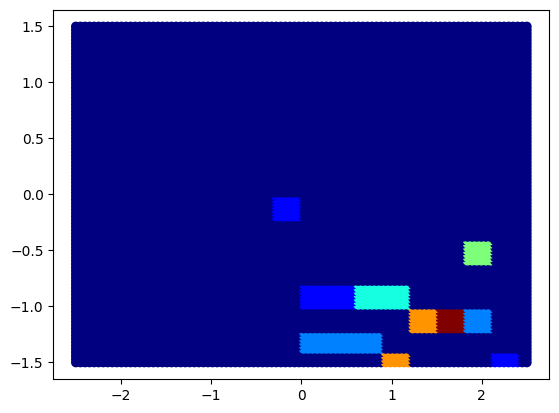

In [16]:
import matplotlib.cm as cm
r_val = np.array([query(starts[i], states[i]) for i in range(len(starts))])
plt.clf()
plt.cla()
plt.scatter(states[:, 0], states[:, 1], c=r_val, cmap=cm.jet)

In [18]:
states

array([[-2.5       , -1.5       ,  0.        ],
       [-2.44949495, -1.5       ,  0.        ],
       [-2.3989899 , -1.5       ,  0.        ],
       ...,
       [ 2.3989899 ,  1.5       ,  0.        ],
       [ 2.44949495,  1.5       ,  0.        ],
       [ 2.5       ,  1.5       ,  0.        ]])

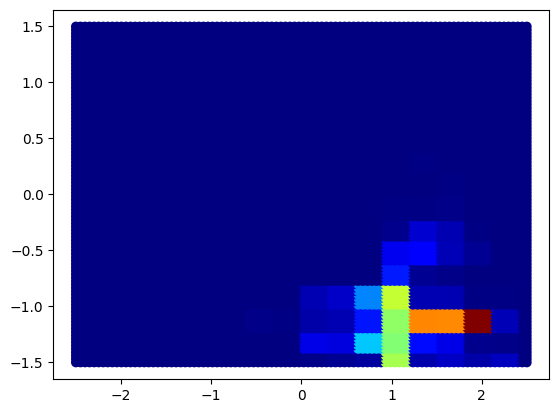

In [19]:
full_prob = []
for state in states:
    prob = get_lp(state)
    full_prob.append(prob)
r_val = np.asarray(full_prob)
plt.scatter(states[:, 0], states[:, 1], c=r_val, cmap=cm.jet)